# Reinforced concrete beams

This notebook calculates and checks the reinforcement in RC beams. It uses *eurocodepy* package to get some calculation functions.

In [1]:
#%pip install eurocodepy --upgrade
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import eurocodepy as ec
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact
from IPython.display import display

This is eurocodepy v0.1.18


In [2]:
# this cell is used to define the widgets
b = widgets.FloatSlider(value=0.3,min=0.15,max=2.0,step=0.025,description='b (m):',readout_format='.3f')
d = widgets.FloatSlider(value=0.5,min=0.20,max=1.0,step=0.005,description='d (m):',readout_format='.3f')
fck = widgets.FloatSlider(value=20,min=20,max=50,step=5,description='fck (MPa):')
fck3 = widgets.Dropdown(
    options=[('C20/25', 13.3), ('C25/30', 16.7), ('C30/37', 20.0), ('C35/45', 23.3), ('C40/50', 26.7), ('C45/55', 30.0), ('C50/60', 33.3)],
    value=13.3,
    description='Betão:',
)
fyk = widgets.FloatSlider(value=400,min=400,max=500,step=100,description='fyk (MPa):')
fyk3 = widgets.Dropdown(
    options=[('A400', 348.0), ('A500', 435.0)],
    value=348,
    description='Aço:',
)
med = widgets.FloatSlider(value=100,min=1,max=1000,step=1,description='Med (kNm):',readout_format='.0f')
tab1 = VBox(children=[b,d,med,fck3,fyk3])
ast = widgets.FloatSlider(value=10,min=0.01,max=50,step=0.01,description='As (cm2):',readout_format='.2f')
iprint = widgets.Checkbox(value=True,description="Print results")

## Calculate reinforcement in beams

In [3]:
a = widgets.interact(ec.ec2.calc_reinf_beam, b=b, d=d, med=med, fcd=fck3, fyd=fyk3, iprint=iprint)

interactive(children=(FloatSlider(value=0.3, description='b (m):', max=2.0, min=0.15, readout_format='.3f', st…

## Calculate bending strength

In [4]:
a = widgets.interact(ec.ec2.calc_mom_beam, b=b, d=d, ast=ast, fcd=fck3, fyd=fyk3, iprint=iprint)


interactive(children=(FloatSlider(value=0.3, description='b (m):', max=2.0, min=0.15, readout_format='.3f', st…

## Comparison of parabola-rectangle diagram with rectangle diagram (in %)

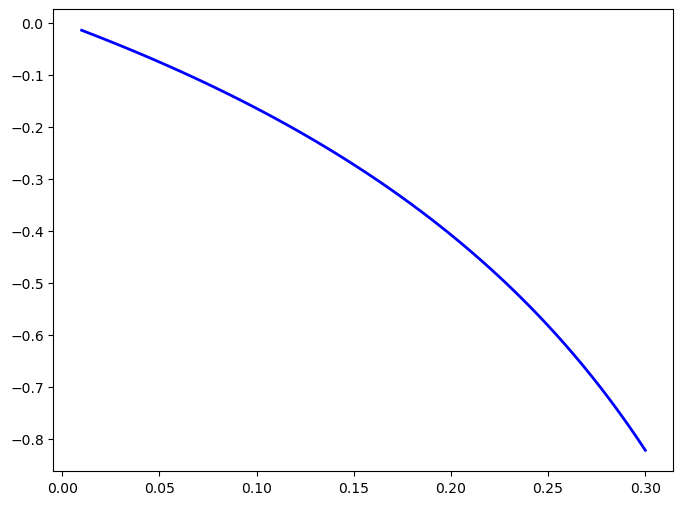

In [5]:
n = 100
t = np.linspace(0.01, 0.3, n)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
om = ((1.0-0.973)*np.ones(n)-np.sqrt(np.ones(n)-2*t)+np.sqrt(0.973*0.973*np.ones(n)-0.973*2*t))/(np.ones(n)-np.sqrt(np.ones(n)-2*t))*100
ax.plot(t, om, lw=2.0, color='blue')